## Working with MNIST DATASET


In [1]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',as_frame=False)

c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


fetch_openml returns data as pd dataframe which is not ideal for images so as_frame=false


In [2]:
x,y=mnist.data,mnist.target
print(x)
x.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(70000, 784)

In [3]:
y


array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [4]:
y.shape

(70000,)

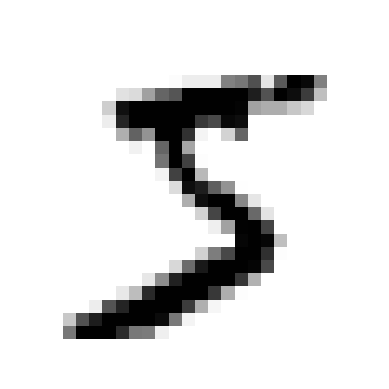

5


In [5]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image=image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')


some_digit=x[0]
plot_digit(some_digit)
plt.show()
print(y[0])

spliting the test and train dataset


In [6]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

## Training a Binary Classifier


In [7]:
y_train_5=(y_train=='5')
y_test_5=y_test=='5'


## SGD


In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_5)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

cross validation


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier()
dummy_clf.fit(x_train,y_train_5)
print(any(dummy_clf.predict(x_train)))

False


In [ ]:
cross_val_score(dummy_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.90965, 0.90965, 0.90965])